In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import matplotlib.gridspec as gridspec

# torch.cuda.is_available()
# device = torch.device("cuda:6" if torch.cuda.is_available() else "cpu")
#torch.cuda.set_device(device)
# torch.set_default_device(device)
device="cpu"

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load results

In [2]:
true_counts = torch.load("../images/setting1_true_counts.pt").to(device)
true_fluxes = torch.load("../images/setting1_true_fluxes.pt").to(device)
true_locs = torch.load("../images/setting1_true_locs.pt").to(device)
true_total_intensities = torch.load("../images/setting1_true_total_intensities.pt").to(device)
images = torch.load("../images/setting1_images.pt").to(device)
true_total_observed_flux = (images - 19200).sum([1,2])

N0 = 20000
kernel_num_iters = [10, 25, 50, 100, 200]
catalogs_per_block = [(3*N0) // (2*k) for k in kernel_num_iters]
setting1_std_posterior_mean_count = torch.load("./setting1_std_posterior_mean_count.pt", map_location=torch.device('cpu')).to(device)
setting1_std_posterior_mean_total_flux = torch.load("./setting1_std_posterior_mean_total_flux.pt", map_location=torch.device('cpu')).to(device)
setting1_std_log_normalizing_constant = torch.load("./setting1_std_log_normalizing_constant.pt", map_location=torch.device('cpu')).to(device)
setting1_std_runtime = torch.load("./setting1_std_runtime.pt", map_location=torch.device('cpu')).to(device)
setting1_std_num_iters = torch.load("./setting1_std_num_iters.pt", map_location=torch.device('cpu')).to(device)

wastefree_M = [50, 80, 125, 160, 200]
setting1_wf_posterior_mean_count = torch.load("./setting1_wf_posterior_mean_count.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_posterior_mean_total_flux = torch.load("./setting1_wf_posterior_mean_total_flux.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_log_normalizing_constant = torch.load("./setting1_wf_log_normalizing_constant.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_runtime = torch.load("./setting1_wf_runtime.pt", map_location=torch.device('cpu')).to(device)
setting1_wf_num_iters = torch.load("./setting1_wf_num_iters.pt", map_location=torch.device('cpu')).to(device)

## Posterior mean source count

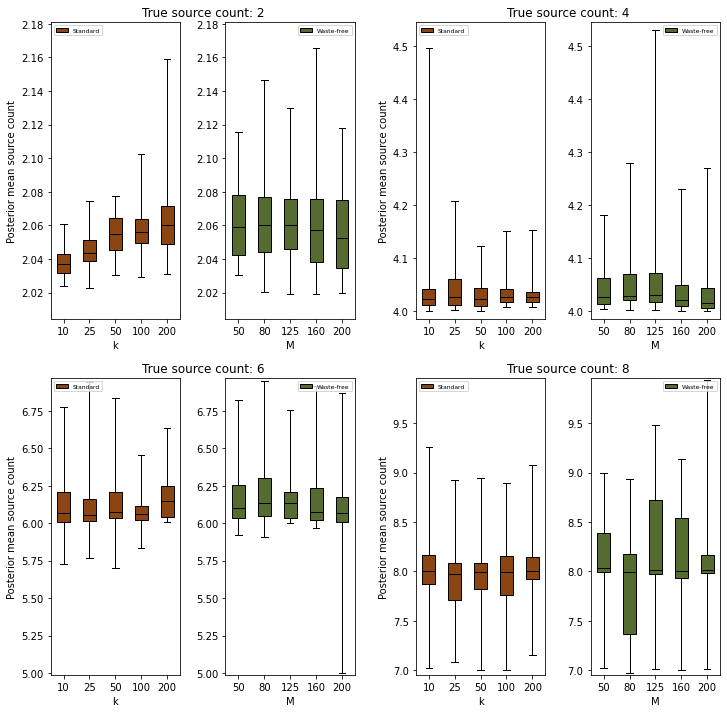

In [3]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_posterior_mean_count, dim = 1)[0], dim = 1)[0], 
torch.min(torch.min(setting1_wf_posterior_mean_count, dim = 1)[0], dim = 1)[0])), 0)[0]

y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_posterior_mean_count, dim = 1)[0], dim = 1)[0], 
torch.max(torch.max(setting1_wf_posterior_mean_count, dim = 1)[0], dim = 1)[0])), 0)[0]


for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_posterior_mean_count[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters) 
        else:
            posterior_mean_count_img_i = setting1_wf_posterior_mean_count[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,
                               patch_artist=True,
                               labels=wastefree_M)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Posterior mean source count')
            for patch in bplot['boxes']:
                patch.set_facecolor('saddlebrown')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('darkolivegreen')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
            
        ax.set_ylim(y_min[i]-0.015, y_max[i]+0.015)
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/posterior_mean_count_plot.png')


## Posterior mean total flux

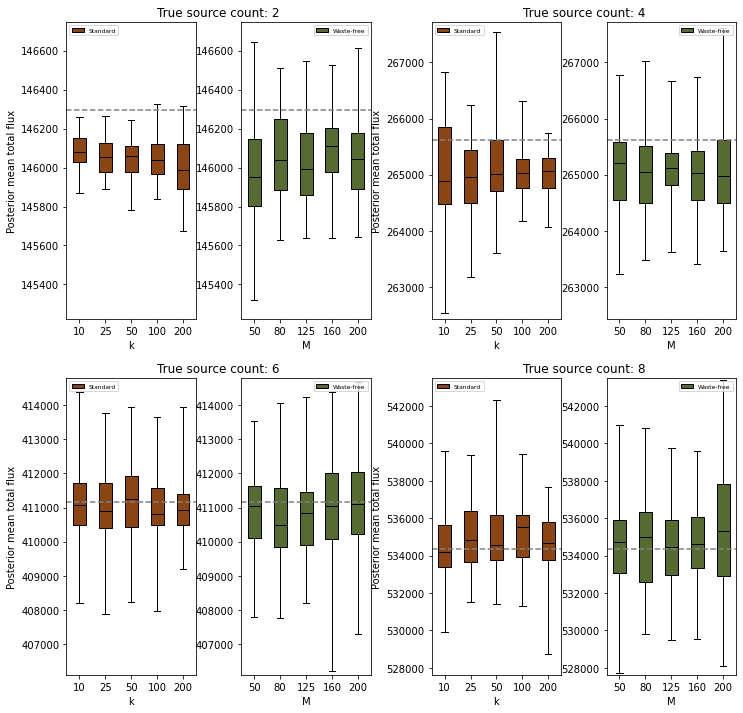

In [4]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

#there has got to be a better way to do this 
y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0], 
torch.min(torch.min(setting1_wf_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0])), 0)[0]

y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0], 
torch.max(torch.max(setting1_wf_posterior_mean_total_flux, dim = 1)[0], dim = 1)[0])), 0)[0]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax, sharey = True)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_posterior_mean_total_flux[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters)  
        else:
            posterior_mean_count_img_i = setting1_wf_posterior_mean_total_flux[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,  
                               patch_artist=True,  
                               labels=wastefree_M)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Posterior mean total flux')
            for patch in bplot['boxes']:
                patch.set_facecolor('saddlebrown')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('darkolivegreen')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
        
        ax.set_ylim(y_min[i]-100, y_max[i]+100)
        
        left, right = ax.get_xlim()
        ax.hlines((images - 19200.).sum([1,2])[i], xmin=left, xmax=right, color='gray', linestyles='--')
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/posterior_mean_total_flux_plot.png')

## Estimated log normalizing constant

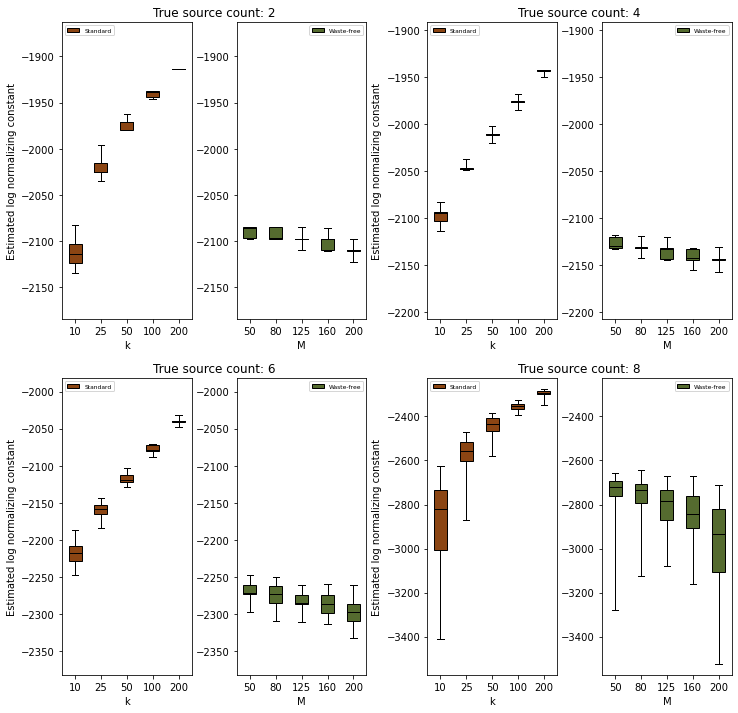

In [5]:
fig = plt.figure(figsize=(12, 12))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

#there has got to be a better way to do this 
y_min = torch.min(torch.stack((torch.min(torch.min(setting1_std_log_normalizing_constant, dim = 1)[0], dim = 1)[0], 
torch.min(torch.min(setting1_wf_log_normalizing_constant, dim = 1)[0], dim = 1)[0])), 0)[0]

y_max = torch.max(torch.stack((torch.max(torch.max(setting1_std_log_normalizing_constant, dim = 1)[0], dim = 1)[0], 
torch.max(torch.max(setting1_wf_log_normalizing_constant, dim = 1)[0], dim = 1)[0])), 0)[0]

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.35, hspace=0.35)
    
        # set outer titles
    ax = plt.Subplot(fig, outer[i])
    ax.set_title("True source count: {}".format((i+1)*2))
    ax.axis('off')
    fig.add_subplot(ax, sharey = True)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if (j == 0): 
            posterior_mean_count_img_i = setting1_std_log_normalizing_constant[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,  
                               patch_artist=True,  
                               labels=kernel_num_iters)  
        else:
            posterior_mean_count_img_i = setting1_wf_log_normalizing_constant[i]
            bplot = ax.boxplot(posterior_mean_count_img_i,
                               whis=(0,100),
                               vert=True,
                               patch_artist=True,
                               labels=wastefree_M)  
        
        if (j == 0):
            ax.set_xlabel('k')
            ax.set_ylabel('Estimated log normalizing constant')
            for patch in bplot['boxes']:
                patch.set_facecolor('saddlebrown')
            ax.legend(bplot["boxes"], ['Standard'], loc='upper left', fontsize = 6)
            
        else:
            ax.set_xlabel("M")
            for patch in bplot['boxes']:
                patch.set_facecolor('darkolivegreen')
            ax.legend(bplot["boxes"], ['Waste-free'], loc='upper right', fontsize = 6)

        for median in bplot['medians']:
            median.set_color('black')
        
        ax.set_ylim(y_min[i]-50, y_max[i]+50)
        
        # t.set_ha('center')
        fig.add_subplot(ax)

# fig.savefig('../setting1_plots/log_normalizing_constant.png')